In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
# import seaborn as sns
# from collections import OrderedDict
# from collections import Counter

# Display pandas df without truncation
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='d')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1,600)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [15]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/brownian/Regions'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/persistent/Regions'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptive/Regions'

# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/brownian/Mixed'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/persistent/Mixed'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptive/Mixed'

In [16]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptive/Mixed exists


In [17]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed mixed areas in details (split blue and red)

In [18]:
completed_task_blue_dict = {}
completed_task_red_dict = {}

timeout = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count_red = []
    completed_task_count_blue = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_blue_dict[str(timeout)] = 0
                completed_task_red_dict[str(timeout)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            
            completed_task_count_blue += [df_completedTask.loc[df_completedTask['type'] == 0].shape[0]]
            completed_task_count_red += [df_completedTask.loc[df_completedTask['type'] == 1].shape[0]]
            
    if(len(completed_task_count_blue)+len(completed_task_count_red)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count_blue)+len(completed_task_count_red)), 'blue'))
    completed_task_blue_dict[str(timeout)] = completed_task_count_blue
    completed_task_red_dict[str(timeout)] = completed_task_count_red
    
            


Timeout folder: Mixed_AdaptiveWalk_2021-07-13_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_AdaptiveWalk_2021-07-13_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_AdaptiveWalk_2021-07-13_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_AdaptiveWalk_2021-07-13_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Mixed_AdaptiveWalk_2021-07-13_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
	WARNING, completed_task_count should be 100!
	len(completed_t

In [9]:
brownian_dict_blue = completed_task_blue_dict
brownian_dict_red = completed_task_red_dict

In [14]:
persistent_dict_blue = completed_task_blue_dict
persistent_dict_red = completed_task_red_dict

In [19]:
adaptive_dict_blue = completed_task_blue_dict
adaptive_dict_red = completed_task_red_dict

In [20]:
def set_box_color(bp, edge_color, fill_color):
    plt.setp(bp['boxes'], color=edge_color)
    plt.setp(bp['whiskers'], color=edge_color)
    plt.setp(bp['caps'], color=edge_color)
    plt.setp(bp['medians'], color=edge_color)
    plt.setp(bp['fliers'], color=green_diamond)
#     for flier in bp['fliers']:
#         flier.set(marker='o', color=edge_color, alpha=1)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [21]:
def boxplot_3dict_2axis(dictl1, dictc1, dictr1, dictl2, dictc2, dictr2):
    ticks = dictr1.keys()

    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
    
    
    bpc1 = ax1.boxplot(dictc1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictc1.values())))*3.0, widths=0.4)
    bpl1 = ax1.boxplot(dictl1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl1.values())))*3.0-0.6, widths=0.4)
    bpr1 = ax1.boxplot(dictr1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictr1.values())))*3.0+0.6, widths=0.4)

    set_box_color(bpl1, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr1, 'blue', 'cyan')
    set_box_color(bpc1, 'green', '#BCEE68')

    ax1.set_xticklabels(dictr1.keys())
    ax1.set_xlabel("Timeout[s]")
    ax1.set_ylabel("Completed areas blue")
    ax1.grid(True,linestyle='-',color='0.85')
    
    ax1.set_ylim(0, 180)
    ax1.set_xticks(range(0, len(ticks) * 3, 3))
    ax1.set_xticklabels(ticks)
    ax1.set_xlim(xmin=-2, xmax=len(ticks)*3)
   
    # draw temporary red and blue lines and use them to create a legend
    ax1.plot([], c='red', label='Brownian')
    ax1.plot([], c='green', label='Persistent')
    ax1.plot([], c='blue', label='Adaptive')
    ax1.legend(loc=2)
    
    bpc2 = ax2.boxplot(dictc2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictc2.values())))*3.0, widths=0.4)
    bpl2 = ax2.boxplot(dictl2.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl2.values())))*3.0-0.6, widths=0.4)
    bpr2 = ax2.boxplot(dictr2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictr2.values())))*3.0+0.6, widths=0.4)

    set_box_color(bpl2, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr2, 'blue', 'cyan')
    set_box_color(bpc2, 'green', '#BCEE68')

    ax2.set_xticklabels(dictr1.keys())
    ax2.set_xlabel("Timeout[s]")
    ax2.set_ylabel("Completed areas red")
    ax2.grid(True,linestyle='-',color='0.85')
    
    ax2.set_ylim(0, 80)
    ax2.set_xticks(range(0, len(ticks) * 3, 3))
    ax2.set_xticklabels(ticks)
    ax2.set_xlim(xmin=-2, xmax=len(ticks)*3)
    

    
    # draw temporary red and blue lines and use them to create a legend
    ax2.plot([], c='red', label='Brownian')
    ax2.plot([], c='green', label='Persistent')
    ax2.plot([], c='blue', label='Adaptive')
    ax2.legend(loc=2)
    
#     plt.tight_layout()
    figName = "completedTaskMeanSplit_"+results_folder.split("/")[-1]+'.png'
    print("Figure name: ", figName)

    plt.savefig(figName)

Figure name:  completedTaskMeanSplit_Mixed.png


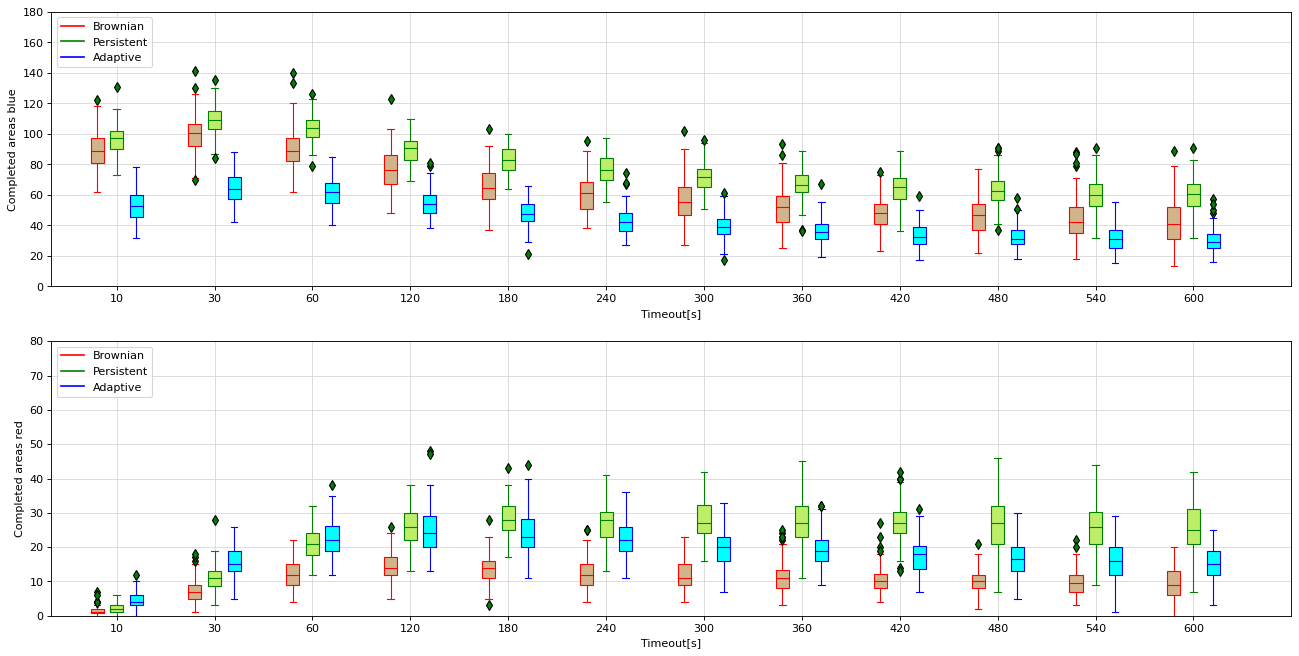

In [22]:
boxplot_3dict_2axis(brownian_dict_blue,persistent_dict_blue,adaptive_dict_blue,brownian_dict_red,persistent_dict_red,adaptive_dict_red)

In [ ]:
# def boxplot_3dict(dictl, dictc, dictr):
#     ticks = dictr.keys()

#     fig, ax = plt.subplots(figsize=(20, 5), dpi=80)

#     bpl = ax.boxplot(dictl.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl.values())))*3.0-0.6, widths=0.4)
#     bpr = ax.boxplot(dictr.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictr.values())))*3.0+0.6, widths=0.4)
#     bpc = ax.boxplot(dictc.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictc.values())))*3.0, widths=0.4)

#     set_box_color(bpl, 'red', 'tan') # colors are from http://colorbrewer2.org/
#     set_box_color(bpr, 'blue', 'cyan')
#     set_box_color(bpc, 'green', '#BCEE68')

#     # draw temporary red and blue lines and use them to create a legend
#     plt.plot([], c='red', label='Brownian')
#     plt.plot([], c='green', label='Persistent')
#     plt.plot([], c='blue', label='Adaptive')
#     plt.legend(loc=2)

#     # plt.xticks(range(0, 300, 5), ticks)
#     # plt.xlim(-3, len(ticks)*3)
#     # plt.ylim(0, 80)
#     plt.xticks(range(0, len(ticks) * 3, 3), ticks)
#     plt.xlim(-2, len(ticks)*3)

#     ax.set_xticklabels(dictr.keys())
#     ax.set_xlabel("Timeout[s]")
#     ax.set_ylabel("Completed areas blue")
#     ax.grid()

#     plt.tight_layout()
#     # plt.savefig('boxcompare.png')

In [ ]:
# boxplot_3dict(brownian_dict_blue,persistent_dict_blue,adaptive_dict_blue)

### Brownian

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50)) 
# ax.set_yticklabels([1,4,5], fontsize=12)
# plt.show()

figName = "completedTaskMean_Mixed_brownian_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

# plt.savefig(figName)

### Persistent

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80, sharey=True)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50))

# plt.show()

figName = "completedTaskMean_Mixed_persistent_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

plt.savefig(figName)

### Adaptive

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80, sharey=True)
c = "red"

box1 = ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond,patch_artist=True)
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box1[element], color=c)

for patch in box1['boxes']:
    patch.set(facecolor='tan')

# ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond,patch_artist=True,boxprops=dict(facecolor='white', color=c),whiskerprops=dict(color=c), capprops=dict(color=c))
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50))

# plt.show()

figName = "completedTaskMean_Mixed_adaptive_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

# plt.savefig(figName)